In [11]:
# sa prezicem calitatea vinului
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [12]:
df=pd.read_csv('Paris.csv')

In [13]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [14]:
# amestecam randurile
df=df.sample(frac=1)

In [15]:
# transformam tabelul in matrici fara coloana cityCode
X=df.drop(['cityCode'], axis=1).values
Y=df['cityCode'].values

In [16]:
# antrenam un model Mashin Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [17]:
# train a antrena modelul
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [18]:
# KNN cum lucreaza pe regresie
knn=KNeighborsRegressor()
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
# calcuram eroarea 
mean_squared_error(Y_pred, Y_test)

997961218.6158082

In [19]:
mean_squared_error(Y_pred, Y_test)**(1/2)

31590.524190266427

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
mean_absolute_error(Y_pred, Y_test)

26796.9328

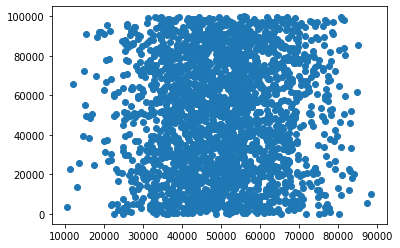

In [22]:
plt.scatter(Y_pred, Y_test)

In [23]:
test=pd.DataFrame(Y_test, columns = ['Y_test'])

In [24]:
test['Y_pred']=Y_pred

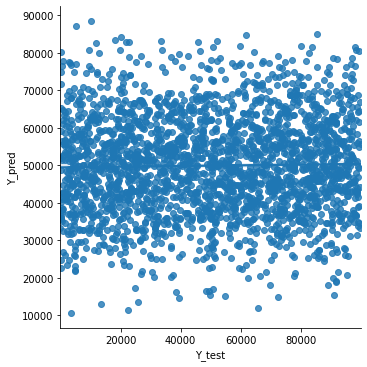

In [25]:
sns.lmplot(data=test, x='Y_test', y='Y_pred')

In [26]:
linear= LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_pred=linear.predict(X_test)

In [28]:
# Al doilea algoritm este mai bun pentru ca eroarea este mai mica
mean_squared_error(Y_pred, Y_test)

845762870.1862566

In [29]:
mean_absolute_error(Y_pred, Y_test)

25240.8189922271

In [30]:
test['Y_test']=Y_test
test['Y_pred']=Y_pred

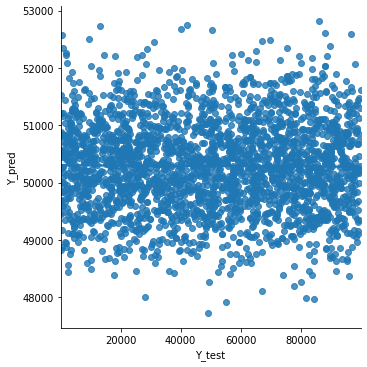

In [31]:
sns.lmplot(data=test, x='Y_test', y='Y_pred')